In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer()

In [4]:
X = pd.DataFrame(df['data'],columns = df['feature_names']) 
y = pd.DataFrame(df['target'],columns=["Target"])

In [5]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [7]:
y['Target'].value_counts()

Target
1    357
0    212
Name: count, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=43)

In [9]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

[Text(0.625, 0.9166666666666666, 'x[27] <= 0.142\ngini = 0.479\nsamples = 381\nvalue = [151, 230]'),
 Text(0.4605263157894737, 0.75, 'x[23] <= 957.45\ngini = 0.18\nsamples = 250\nvalue = [25, 225]'),
 Text(0.2894736842105263, 0.5833333333333334, 'x[20] <= 15.78\ngini = 0.082\nsamples = 233\nvalue = [10, 223]'),
 Text(0.10526315789473684, 0.4166666666666667, 'x[21] <= 32.78\ngini = 0.01\nsamples = 202\nvalue = [1, 201]'),
 Text(0.05263157894736842, 0.25, 'gini = 0.0\nsamples = 188\nvalue = [0, 188]'),
 Text(0.15789473684210525, 0.25, 'x[21] <= 33.8\ngini = 0.133\nsamples = 14\nvalue = [1, 13]'),
 Text(0.10526315789473684, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.21052631578947367, 0.08333333333333333, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.47368421052631576, 0.4166666666666667, 'x[21] <= 27.46\ngini = 0.412\nsamples = 31\nvalue = [9, 22]'),
 Text(0.3684210526315789, 0.25, 'x[24] <= 0.14\ngini = 0.159\nsamples = 23\nvalue = [2, 21]'),
 Text(

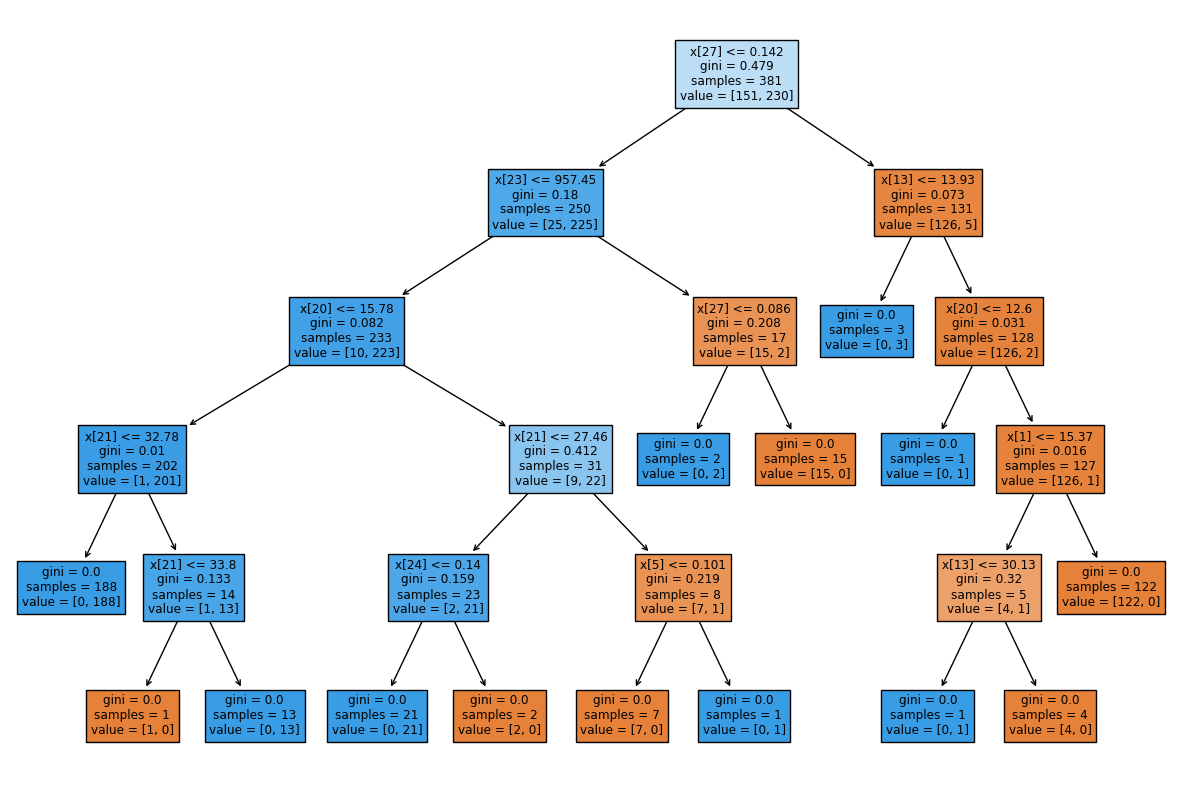

In [10]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [11]:
params = [{'max_depth':[1,2,3,4,5,10,15,20,25,30,35,40,45,50,60,70,80,90,100]}]

In [12]:
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(clf,param_grid=params,scoring='recall',cv=5)
model.fit(X_train,y_train)
print(model.best_params_,model.best_score_)

{'max_depth': 50} 0.9608695652173914


[Text(0.625, 0.9166666666666666, 'x[27] <= 0.142\ngini = 0.479\nsamples = 381\nvalue = [151, 230]'),
 Text(0.4605263157894737, 0.75, 'x[23] <= 957.45\ngini = 0.18\nsamples = 250\nvalue = [25, 225]'),
 Text(0.2894736842105263, 0.5833333333333334, 'x[20] <= 15.78\ngini = 0.082\nsamples = 233\nvalue = [10, 223]'),
 Text(0.10526315789473684, 0.4166666666666667, 'x[21] <= 32.78\ngini = 0.01\nsamples = 202\nvalue = [1, 201]'),
 Text(0.05263157894736842, 0.25, 'gini = 0.0\nsamples = 188\nvalue = [0, 188]'),
 Text(0.15789473684210525, 0.25, 'x[21] <= 33.8\ngini = 0.133\nsamples = 14\nvalue = [1, 13]'),
 Text(0.10526315789473684, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.21052631578947367, 0.08333333333333333, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.47368421052631576, 0.4166666666666667, 'x[1] <= 20.995\ngini = 0.412\nsamples = 31\nvalue = [9, 22]'),
 Text(0.3684210526315789, 0.25, 'x[24] <= 0.14\ngini = 0.159\nsamples = 23\nvalue = [2, 21]'),
 Text(

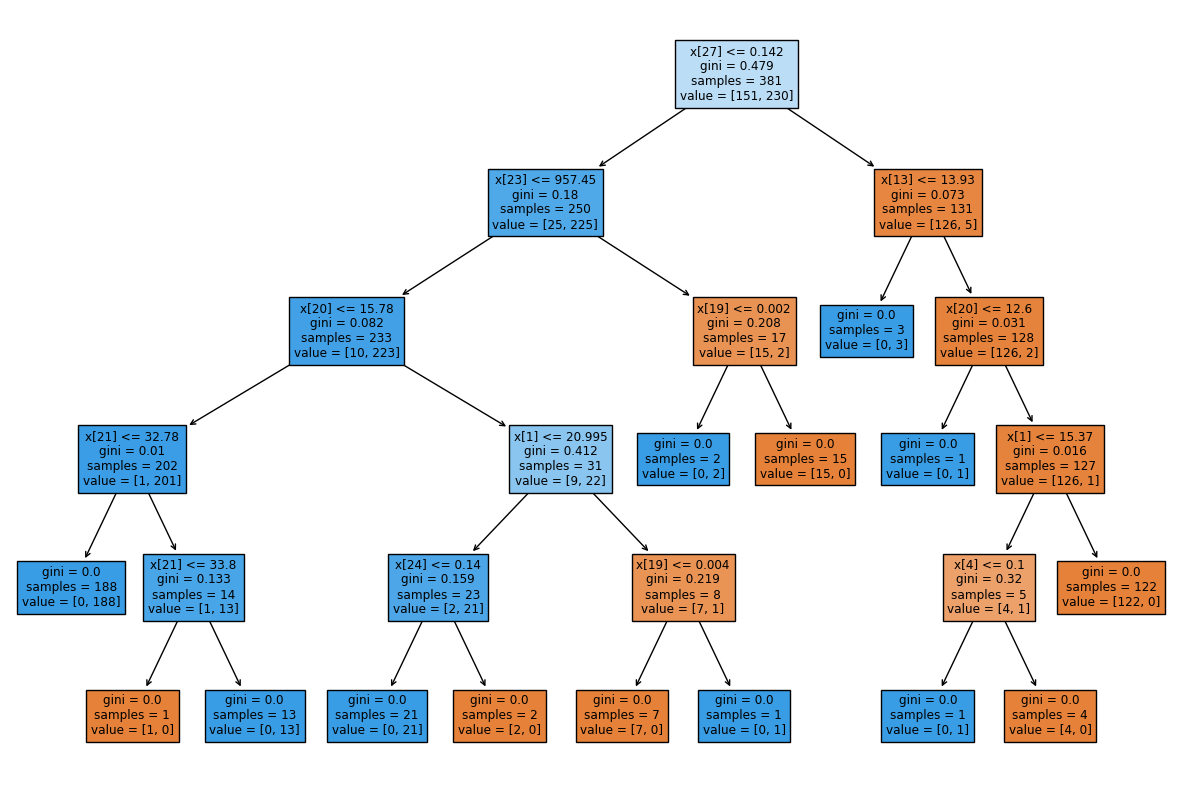

In [13]:
plt.figure(figsize=(15,10))
tree.plot_tree(model.best_estimator_,filled=True)

In [14]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1])

In [15]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [16]:
confusion_matrix(y_test,y_pred)

array([[ 55,   6],
       [ 11, 116]])

In [17]:
accuracy_score(y_test,y_pred)

0.9095744680851063

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87        61
           1       0.95      0.91      0.93       127

    accuracy                           0.91       188
   macro avg       0.89      0.91      0.90       188
weighted avg       0.91      0.91      0.91       188

